In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

X,y = make_circles(n_samples=300,noise=0.3, factor=0.1, random_state=1)
# shuffle the dataset
X, y = shuffle(X, y, random_state=0)
# Split the dataset in two parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [2]:
def plot_hyperplane(X_,y_,clf, optimal_C, optimal_gamma):
    accuracy = accuracy_score(y_, clf.predict(X_))
    
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
    

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(9, 9))
    ax = plt.subplot(1, 1, 1)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=cm_bright,
                       edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('C='+str(optimal_C)+',gamma='+str(optimal_gamma))
    ax.text(xx.max() - .3, yy.min() + .3, ('accuracy:%.2f' % accuracy).lstrip('0'),
                    size=15, horizontalalignment='right')
    plt.show()


In [3]:
# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
                'gamma': [1e-4, 0.01, 0.1, 0.5],
                'C': [1, 10, 100, 1000]}]
print("# Tuning hyper-parameters")
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(X_train, y_train)


print('best parameters:')
print(clf.best_params_)
print('-------------------------------------')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

# Tuning hyper-parameters
best parameters:
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-------------------------------------
0.543 (+/-0.063) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.590 (+/-0.082) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.771 (+/-0.140) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.905 (+/-0.030) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.543 (+/-0.063) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.590 (+/-0.019) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.895 (+/-0.071) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.924 (+/-0.036) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.543 (+/-0.063) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.762 (+/-0.141) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.905 (+/-0.052) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.914 (+/-0.049) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.543 (+/-0.047) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.900 (+/-0.076) for {'C': 1000, 'gamma': 0.01, 'kernel

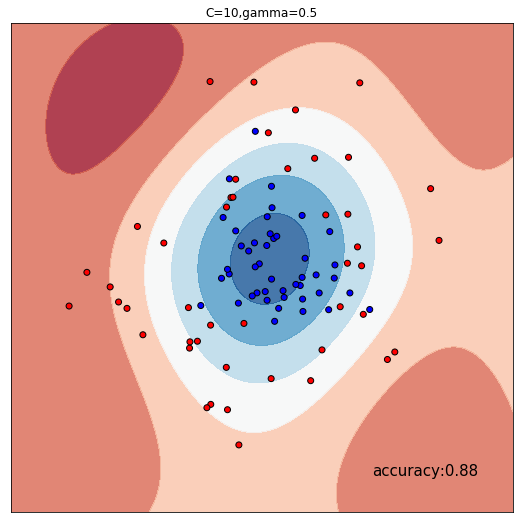

In [4]:
optimal_C = 10
optimal_gamma = 0.5

clf = SVC(kernel="rbf", gamma=optimal_gamma, C=optimal_C)
clf.fit(X_train, y_train)
plot_hyperplane(X_test,y_test,clf,optimal_C,optimal_gamma)